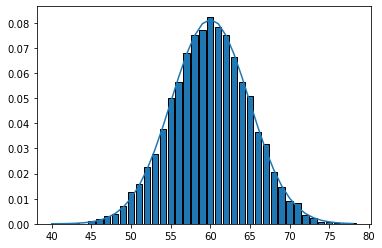

In [45]:
from matplotlib import pyplot as plt
from collections import Counter
from typing import List
import random
import math

num_tries = 100
num_samples = 10000
probability = 0.6

# reference: https://en.wikipedia.org/wiki/Normal_distribution
def normal_cdf(x: float, mu:float = 0, sigma:float = 1) -> float:
    return (1 + math.erf((x - mu)/math.sqrt(2)/sigma)) / 2

def bernoulli_trial(p:float) -> int:
    return 1 if random.random() < p else 0

results = [sum([bernoulli_trial(probability) for i in range(num_tries)]) for j in range(num_samples)]
histogram = Counter(results)

plt.bar(histogram.keys(), [a / num_samples for a in histogram.values()], 0.8, edgecolor=(0, 0, 0))

x_from = math.floor(min(results))
x_to = math.ceil(max(results))

mu = probability * num_tries
sigma = math.sqrt(num_tries * probability * (1 - probability))
xs = [x for x in range(x_from - 1, x_to + 1)]
probabilities = [normal_cdf(x + 0.5, mu, sigma) - normal_cdf(x - 0.5, mu, sigma) for x in xs]
plt.plot(xs, probabilities)


plt.show()